In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

import pycountry
import seaborn as sns

**Goal of this notebook: study the presence of the media and their coverage of the events happening in Tunisia, during the presidential elections which happened in 2014**

In [3]:
tunisia_actor1 = pd.read_csv('../TunisiaActor1.csv', sep = ',', decimal = '.')
tunisia_actor2 = pd.read_csv('../TunisiaActor2.csv', sep = ',', decimal = '.')

tunisia_actor_tot = pd.concat([tunisia_actor1, tunisia_actor2], axis=0)
tunisia_actor_tot.reset_index(inplace=True)

nodes1 = tunisia_actor1['SOURCEURL'].size
nodes2 = tunisia_actor2['SOURCEURL'].size
nodes_tot = tunisia_actor_tot['SOURCEURL'].size

In [5]:
tunisia_actor_tot['SQLDATE']

0        20141108
1        20141108
2        20141026
3        20141026
4        20141118
5        20141027
6        20141119
7        20141114
8        20141114
9        20141114
10       20141020
11       20141020
12       20141030
13       20141009
14       20141120
15       20141120
16       20141108
17       20141123
18       20141123
19       20141025
20       20141005
21       20141201
22       20141201
23       20141106
24       20141106
25       20141124
26       20141124
27       20141014
28       20141027
29       20141022
           ...   
10425    20141124
10426    20141120
10427    20141119
10428    20141023
10429    20141015
10430    20141016
10431    20141015
10432    20141015
10433    20141106
10434    20141106
10435    20141106
10436    20141106
10437    20141105
10438    20141001
10439    20141122
10440    20141122
10441    20141026
10442    20141026
10443    20141026
10444    20141027
10445    20141027
10446    20141026
10447    20141026
10448    20141030
10449    2

In [9]:
# Study of the news outlet involved during the presidential election period

web_news = [''] * nodes_tot
media_df = pd.DataFrame(columns=['Medias','Ocurrences'])

for row in range(0, nodes_tot):
    temp = tunisia_actor_tot['SOURCEURL'][row].rsplit('//')
    
    if len(temp) == 2:
        temp2 = temp[1].rsplit('/')[0]
        web_news[row] = temp2
    else:
        web_news[row] = ''
    
    if web_news[row] not in media_df['Medias'].values:
        media_df.loc[len(media_df)]=[web_news[row], 1] 
    else:
        media_df.loc[media_df['Medias'] == web_news[row], 'Ocurrences'] += 1

/Users/aminmekacher/miniconda3/envs/gdelt_project/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


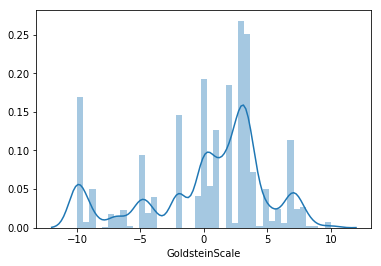

In [21]:
goldstein_df = tunisia_actor_tot['GoldsteinScale']
np.max(goldstein_df), np.min(goldstein_df), np.mean(goldstein_df)

ax = sns.distplot(goldstein_df)

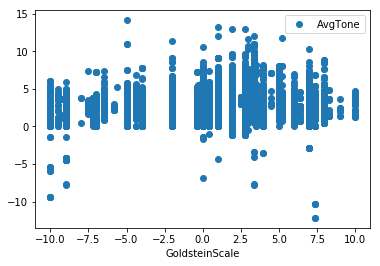

In [22]:
#avgtone_df = swiss_df['AvgTone']
tunisia_actor_tot.plot(x='GoldsteinScale', y='AvgTone', style='o')